<a href="https://colab.research.google.com/github/pedro-barreto/Trabalho-IA/blob/main/wdbc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Informações básicas

---



**Integrantes**
- Pedro Henrique Barreto dos Santos - 475626
- Leyverson de Oliveirqa Freitas - 476474
- Francisco André da Silva Freire - 470997

**Base de dados usada**

- https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

**Objetivo do trabalho**

- Ler a base de dados e procurar um padrão nos dados lidos, com isso, ver a probabilidade que a o paciente tem de ter um cancer de mama maligno ou benigno

##Importando todas as extensões necessárias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

## Importanto o banco de dados

>Foi colocado as configurações de acordo com o site, como: dados separados por virgula e nome das colunas que não estão inclusas no banco

In [2]:
df = pd.read_csv("wdbc.data", delimiter=',', names=['ID','Diagnosis','radius1','texture1','perimeter1','area1','smoothness1','compactness1','concavity1','concave_points1','symmetry1','fractal_dimension1','radius2','texture2','perimeter2','area2','smoothness2','compactness2','concavity2','concave_points2','symmetry2','fractal_dimension2','radius3','texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave_points3','symmetry3', 'fractal_dimension3'])

>Decidimos transformando o "Diagnosis" em número para tratar melhor os dados, onde B (benign) = 0 e M (malignant) = 1

In [3]:
df['Diagnosis'] = df['Diagnosis'].replace({"B": 0, "M": 1})#benigno = 0 e maligno = 1
df['Diagnosis'] = df['Diagnosis'].astype(int) #transformando o número de float para inteiro

# 2. Pré-processamento de dados

---

##Checando se há valores ausentes

>Não há valores nulos, pois a soma de todos os valores nulos é 0

In [4]:
df.isnull().sum()

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

>Outra função para checar os dados, como: valores não nulos e o total de memória usada

In [5]:
df.info() #aqui podemos ver que o "diagnosis" virou realmente int, e todas as colunas tem 569 tuplas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    int64  
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [6]:
print(df.shape) #aqui vemos que todas as linhas e colunas estão corretas, tem a quantidade certa

(569, 32)


## Checando se há ruídos



>Habilitando a visualização de todas as colunas

In [7]:
pd.set_option('display.max_columns', None) #como são muitas colunas, é necessário isto para ver todas

In [8]:
df.head() #aqui podemos passar o olho por cima, ver somente as 5 primeiras linhas e se tem algo fora do comum

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df = df.set_index('ID') #setando o index da tupla para ser o ID

In [10]:
df.describe() #checando as informações gerais do data frame

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


>Habilitando a visualização de todas as linhas

In [11]:
pd.set_option('display.max_rows', None)

>Vimos valores diferentes na coluna radius2, onde os valores não seguiam um padrão que fica entre 0 e 1

In [ ]:
df

Removemos as linhas fora do padrão

In [13]:
#foram removidas 22 linhas
df_com_remocao = df.drop([842302, 852631, 855133, 86355, 865423, 868826, 8712766, 8810703, 88299702, 884948, 887181, 88995002, 8910988, 892438, 89263202, 89812, 9011971, 9012000, 90602302, 911296202, 915143, 926424])

>Checando a remoção

In [ ]:
df_com_remocao

#3. Seleção e aplicação de algoritmos

---



##Dados sem a remoção

In [15]:
X = df.drop('Diagnosis', axis=1) #aqui, o valor de X é toda a tabela, com excessão do Diagnosis
y = df['Diagnosis'] #o alvo do nosso sistema é o Diagnosis

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36)
#aqui estamos separando o X e y, no caso uma parte para treino e outra para teste. 30% para teste e 70% para treinamento
#o random_state é um número aléatorio que escolhemos, com isso nós garantimos que a divisão dos dados em conjuntos de treinamento e teste seja sempre a mesma

In [17]:
#chencando se foi separado devidamente
print(X_train.shape) #(569 * 0.7) = 398.3, (32 colunas - ID e Diagnosis) = 30
print(X_test.shape)  #(569 * 0.3) = 170.7, (32 colunas - ID e Diagnosis) = 30
print(y_train.shape) #(569 * 0.7) = 398.3
print(y_test.shape)  #(569 * 0.3) = 170.7

(398, 30)
(171, 30)
(398,)
(171,)


In [18]:
model = LogisticRegression(C=0.1, max_iter=1000)
#modelo usando a regressão logística
#o parâmetro C é responsável pelo controle da regularização no modelo
#o parâmetro max_iter define o número máximo de iterações que o algoritmo de treinamento irá realizar para convergir

In [19]:
model.fit(X_train, y_train)
#ajustando os parâmetros do modelo aos dados de treinamento para encontrar a melhor representação dos padrões presentes nos dados

LogisticRegression(C=0.1, max_iter=1000)

In [20]:
y_pred = model.predict(X_test)
#aqui estamos salvando os valores que foram treiando e previstos pelo modelo

In [21]:
df['predictions'] = model.predict_proba(df.drop('Diagnosis', axis = 1))[:,1]
#aqui estamos criando uma nova coluna, contendo as probabilidade estudadas, ignorando a coluna alvo(Diagnosis)

In [22]:
df #checando a nova tabela criada

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,predictions
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,1,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,1.0950,0.9053,8.5890,153.400,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.265400,0.4601,0.11890,1.000000
842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902,1.000000
84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758,1.000000
84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300,0.440239
84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678,0.999634
843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440,0.710622
844359,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368,0.999999
84458202,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510,0.994667
844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720,0.832401


##Dados com a remoção

>**OBS:** aqui é a mesma coisa que o de cima, só que levando em consideração a remoção

In [23]:
X_com_remocao = df_com_remocao.drop('Diagnosis', axis=1) #aqui, o valor de X é toda a tabela, com excessão do Diagnosis
y_com_remocao = df_com_remocao['Diagnosis'] #o alvo do nosso sistema é o Diagnosis

In [24]:
X_train_com_remocao, X_test_com_remocao, y_train_com_remocao, y_test_com_remocao = train_test_split(X_com_remocao, y_com_remocao, test_size=0.3, random_state=36)
#aqui estamos separando o X e y, no caso uma parte para treino e outra para teste. 30% para teste e 70% para treinamento
#o random_state é um número aléatorio que escolhemos, com isso no garantimos que a divisão dos dados em conjuntos de treinamento e teste seja sempre a mesma

In [25]:
#chencando se foi separado devidamente, lembrando que nesse data frame foi removido 22 linhas
print(X_train_com_remocao.shape) #((569 - 22) * 0.7) = 382.9, (32 colunas - ID e Diagnosis) = 30
print(X_test_com_remocao.shape)  #((569 - 22) * 0.7) = 164.1, (32 colunas - ID e Diagnosis) = 30
print(y_train_com_remocao.shape) #((569 - 22) * 0.7) = 382.9
print(y_test_com_remocao.shape)  #((569 - 22) * 0.7) = 164.1

(382, 30)
(165, 30)
(382,)
(165,)


In [26]:
model_com_remocao = LogisticRegression(C=0.1, max_iter=1000)
#modelo usando a regressão logística
#o parâmetro C é responsável pelo controle da regularização no modelo
#o parâmetro max_iter define o número máximo de iterações que o algoritmo de treinamento irá realizar para convergir

In [27]:
model_com_remocao.fit(X_train_com_remocao, y_train_com_remocao)
#ajustando os parâmetros do modelo aos dados de treinamento para encontrar a melhor representação dos padrões presentes nos dados

LogisticRegression(C=0.1, max_iter=1000)

In [28]:
y_pred_com_remocao = model_com_remocao.predict(X_test_com_remocao)
#aqui estamos salvando os valores que foram treiando e previstos pelo modelo

In [29]:
df_com_remocao['predictions'] = model_com_remocao.predict_proba(df_com_remocao.drop('Diagnosis', axis = 1))[:,1]
#aqui estamos criando uma nova coluna, contendo as probabilidade estudadas, ignorando a coluna alvo(Diagnosis)

In [30]:
df_com_remocao #checando a nova tabela criada

,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,predictions
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842517,1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.186000,0.2750,0.08902,9.998949e-01
84300903,1,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,0.7456,0.7869,4.5850,94.030,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.243000,0.3613,0.08758,9.999775e-01
84348301,1,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,0.4956,1.1560,3.4450,27.230,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.257500,0.6638,0.17300,7.765703e-01
84358402,1,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813,5.4380,94.440,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.162500,0.2364,0.07678,9.811663e-01
843786,1,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,0.3345,0.8902,2.2170,27.190,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.174100,0.3985,0.12440,7.465600e-01
844359,1,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,0.4467,0.7732,3.1800,53.910,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.193200,0.3063,0.08368,9.999977e-01
84458202,1,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,0.5835,1.3770,3.8560,50.960,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.155600,0.3196,0.11510,9.893346e-01
844981,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,1.0020,2.4060,24.320,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.206000,0.4378,0.10720,9.619860e-01
84501001,1,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,0.2976,1.5990,2.0390,23.940,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.221000,0.4366,0.20750,9.833266e-01


#4. Avaliação de desempenho

---

In [31]:
#aqui estamos usando a medida de dempenho RMSE, onde ele calcula a raiz quadrada do erro quadrático médio, entre os rótulos verdadeiros e as previsões feitas pelo modelo
rmse = mean_squared_error(y_test, y_pred, squared=False) #foi colocado false pois nós desejamos obter uma medida de erro mais interpretável, em que os valores estão na mesma escala que os dados originais
print("RMSE:", rmse)

RMSE: 0.26490647141300877


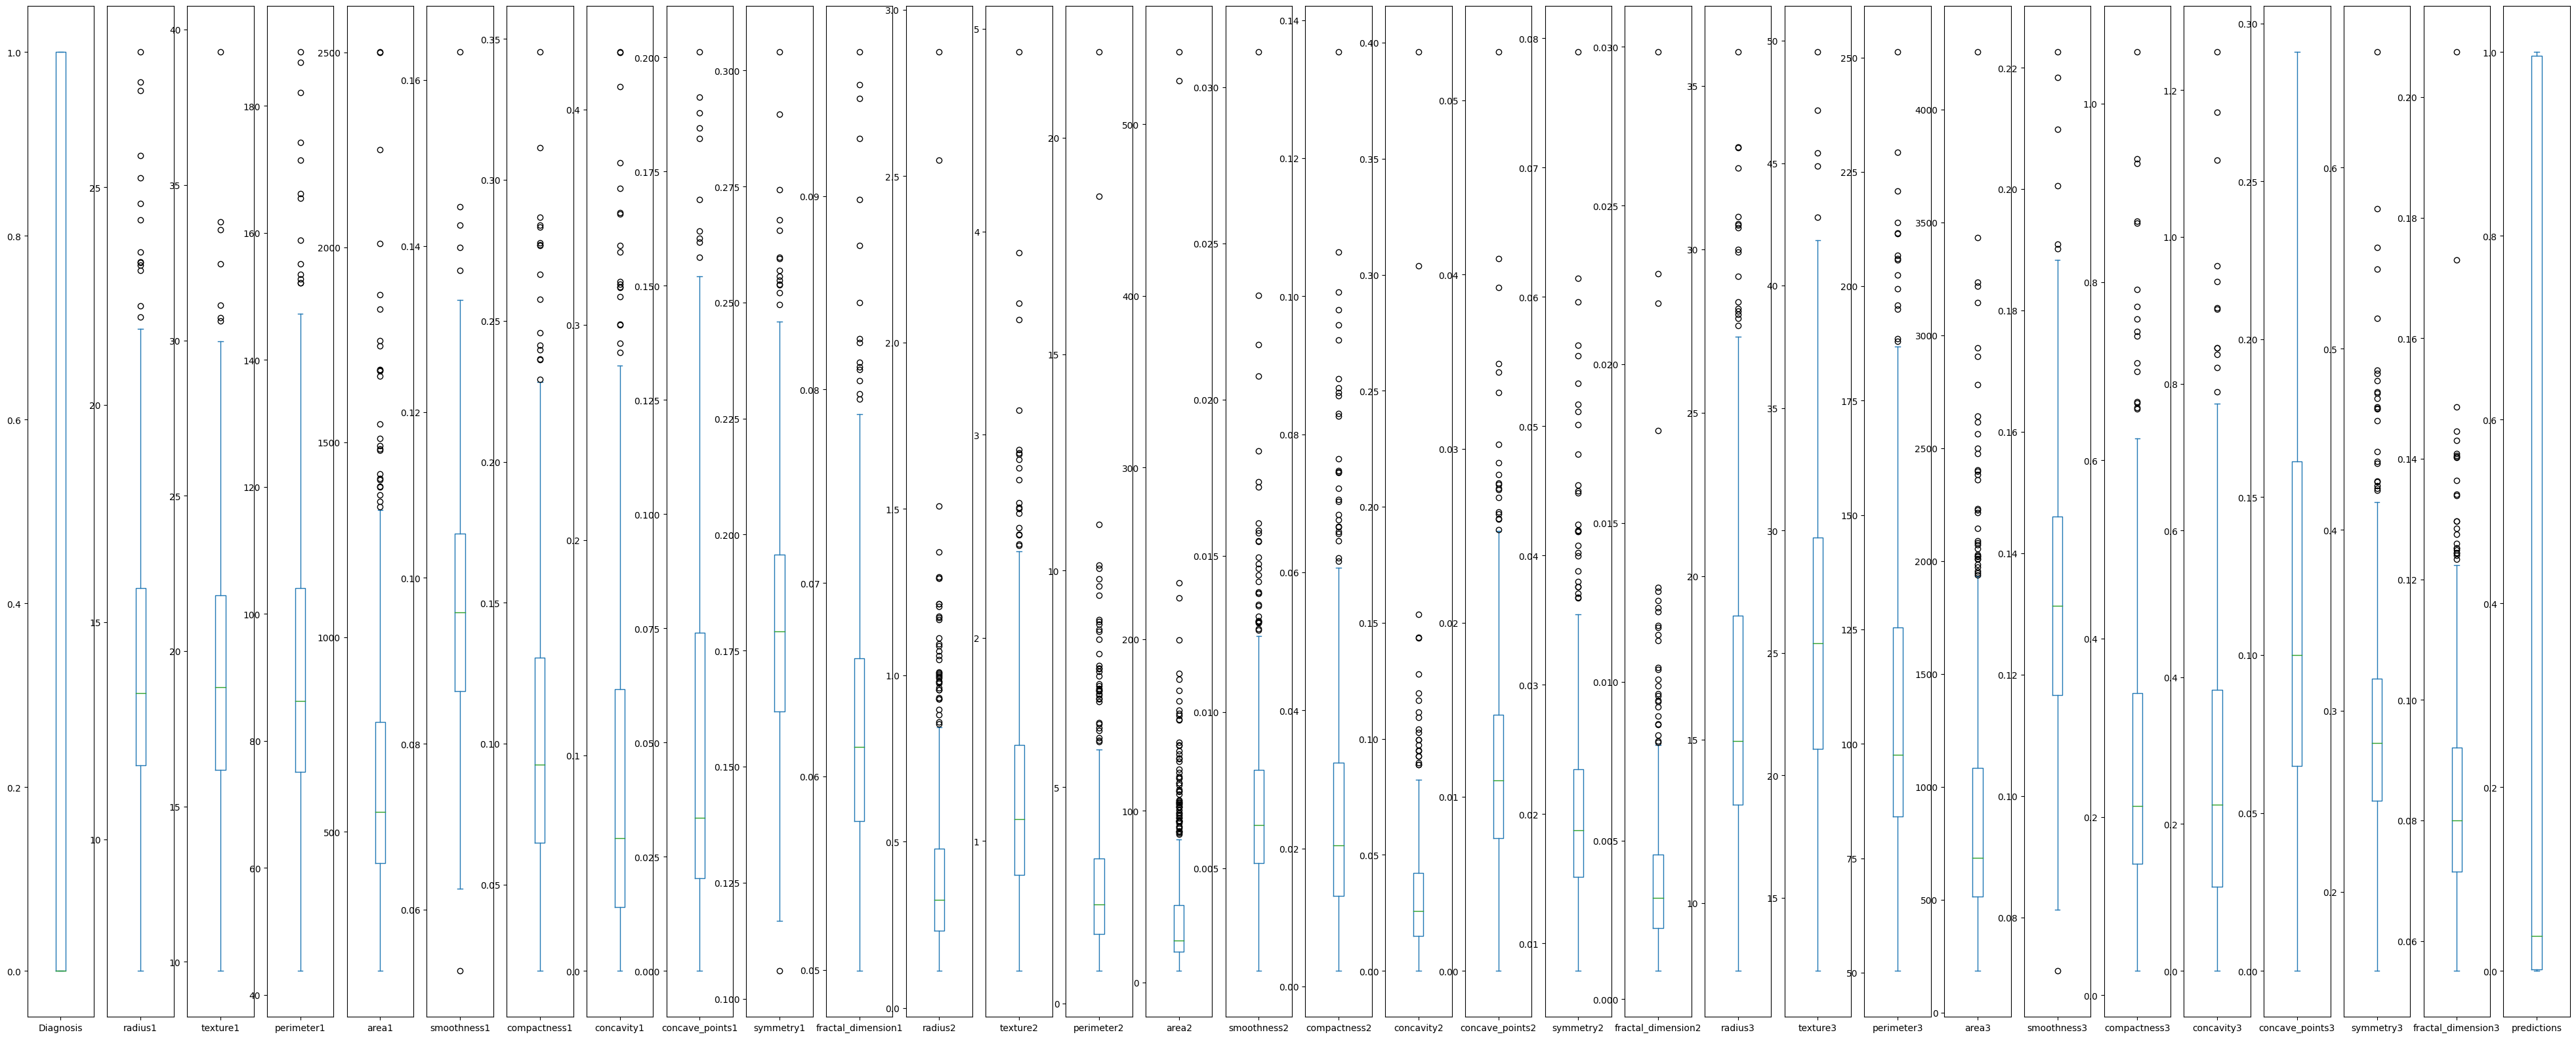

In [32]:
df.plot.box(subplots=True, figsize=(50, 20));
#aqui o gráfico de caixa, contendo a mediana, intervalo interquartil, whiskers e pontos individuais(outliers)
#mais detalhes: https://www.escolaedti.com.br/o-que-e-um-box-plot

In [33]:
#aqui estamos usando a medida de dempenho RMSE, onde ele calcula a raiz quadrada do erro quadrático médio, entre os rótulos verdadeiros e as previsões feitas pelo modelo
rmse_com_remocao = mean_squared_error(y_test_com_remocao, y_pred_com_remocao, squared=False) #foi colocado false pois nós desejamos obter uma medida de erro mais interpretável, em que os valores estão na mesma escala que os dados originais
print("RMSE:", rmse_com_remocao)

RMSE: 0.19069251784911845


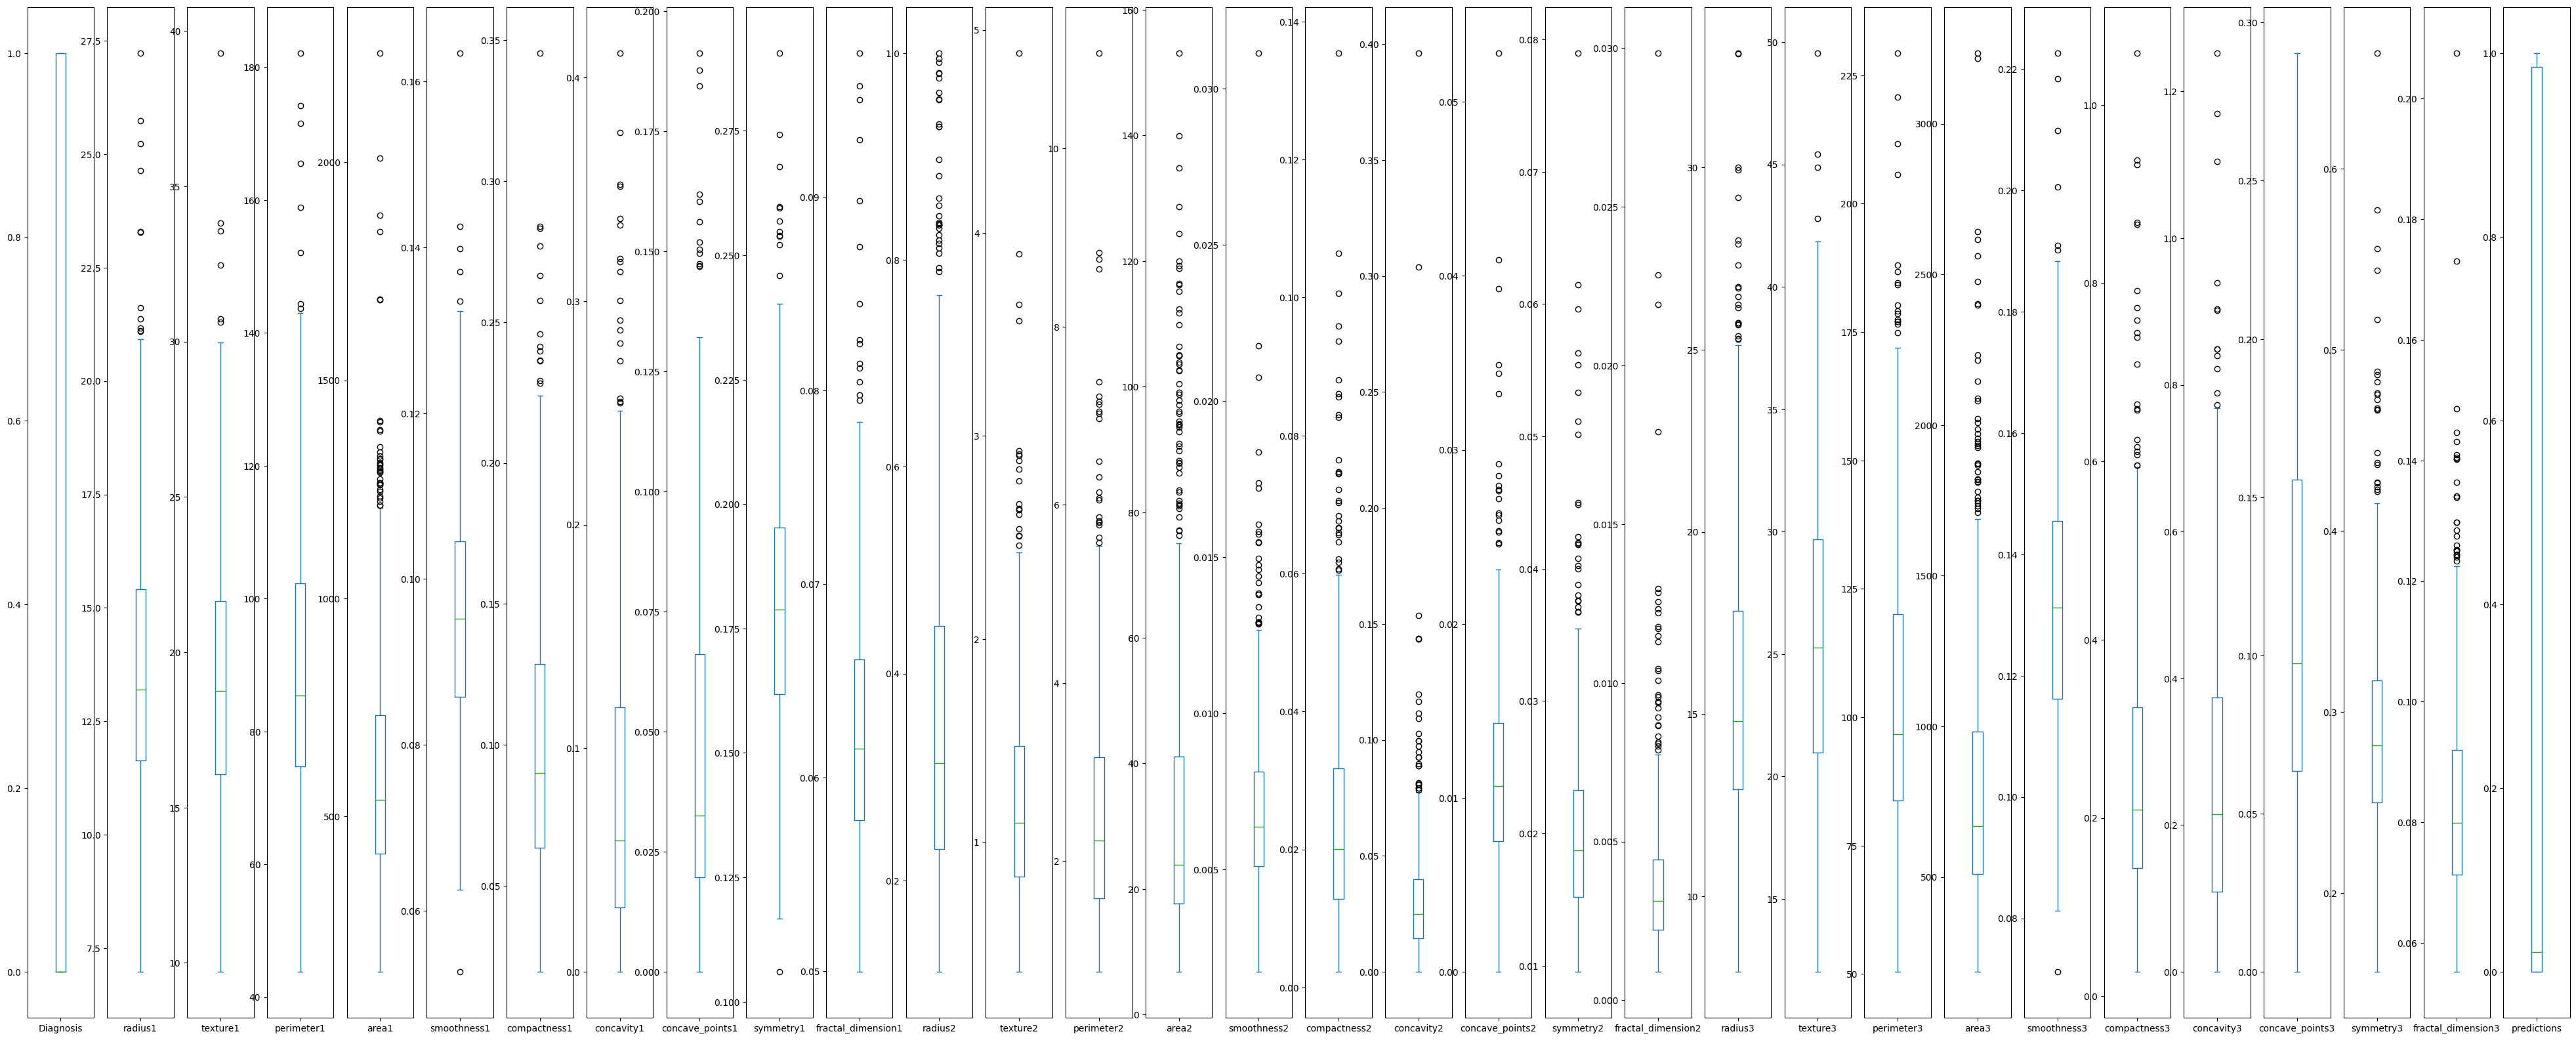

In [34]:
df_com_remocao.plot.box(subplots=True, figsize=(50, 20));
#aqui o gráfico de caixa, contendo a mediana, intervalo interquartil, whiskers e pontos individuais(outliers)
#mais detalhes: https://www.escolaedti.com.br/o-que-e-um-box-plot

#5. Discussão e conclusão

---

>Neste trabalho nós usamos o algoritmo de regressão logística, pois ele se encaixa bem na nossa situação de classificação(B ou M), apesar do nome ser regressão, ele é usado para uma classificação supervisionada. Outro motivo da escolha foi a facilidade para usar esse algoritmo, porém o seu ponto fraco foi que o algoritmo assume que as observações são independentes entre si. Se houver dependência ou correlação entre as observações, os resultados do modelo podem ser imprecisos, mas mesmo assim ele supriu as nossas expectativas.

>Nós usamos o RMSE (Root Mean Squared Error) para analisar o desempenho do modelo, onde pode percebesse que o data frame sem alteração alguma já há um bom resultado, que é "0.2649...". Com o tratamento do data frame, nós conseguimos melhorar mais ainda o modelo, onde o RMSE retornou um valor de "0.1906...". O valor do RSME é melhor quando menor for o resultado, ou seja, o nosso tratamento teve uma melhoria significativa no desempenho, você pode ver a diferença de resultado pelo gráfico boxplot.

>Portanto, com esse trabalho nós percebemos que o desempenho do modelo foi ótimo, com ele você pode checar a probabilidade do câncer ser maligno ou benigno somente com as poucas informações que foram cadastradas, com isso é possível economizar e facilitar significativamente o tempo do profissional que atua na área da saúde.
